# Handling Date Variables

In [1]:
#------------------------------------------------------------------------------------
# Pramodkumar Gupta
# Handing Numerical Features
#------------------------------------------------------------------------------------

# Import all libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
use_cols = ['loan_amnt', 'grade', 'purpose', 'issue_d', 'last_pymnt_d']
df=pd.read_csv('loan.csv', usecols=use_cols).sample(10000, random_state=44)
df.head()

,loan_amnt,grade,issue_d,purpose,last_pymnt_d
70642,12000,B,Nov-2018,other,Feb-2019
490788,20000,B,Jan-2018,debt_consolidation,Feb-2019
2081591,35000,D,Feb-2014,debt_consolidation,Feb-2017
900431,8000,A,Oct-2016,home_improvement,Jan-2019
781582,17000,B,Feb-2016,debt_consolidation,Jun-2018


In [3]:
df.dtypes

loan_amnt        int64
grade           object
issue_d         object
purpose         object
last_pymnt_d    object
dtype: object

In [4]:
df['issue_dt']=pd.to_datetime(df['issue_d'])
df['last_pymnt_dt']=pd.to_datetime(df['last_pymnt_d'])

df.head()

,loan_amnt,grade,issue_d,purpose,last_pymnt_d,issue_dt,last_pymnt_dt
70642,12000,B,Nov-2018,other,Feb-2019,2018-11-01,2019-02-01
490788,20000,B,Jan-2018,debt_consolidation,Feb-2019,2018-01-01,2019-02-01
2081591,35000,D,Feb-2014,debt_consolidation,Feb-2017,2014-02-01,2017-02-01
900431,8000,A,Oct-2016,home_improvement,Jan-2019,2016-10-01,2019-01-01
781582,17000,B,Feb-2016,debt_consolidation,Jun-2018,2016-02-01,2018-06-01


In [5]:
df1=df.groupby(['issue_dt','grade'])['loan_amnt'].sum().reset_index()
df1

,issue_dt,grade,loan_amnt
0,2007-10-01,F,12000
1,2007-12-01,B,8800
2,2007-12-01,D,6000
3,2007-12-01,E,12000
4,2008-02-01,A,17200
...,...,...,...
618,2018-12-01,B,635700
619,2018-12-01,C,886450
620,2018-12-01,D,538375
621,2018-12-01,E,156000


Text(0, 0.5, 'Disbursed Amount (US Dollars)')

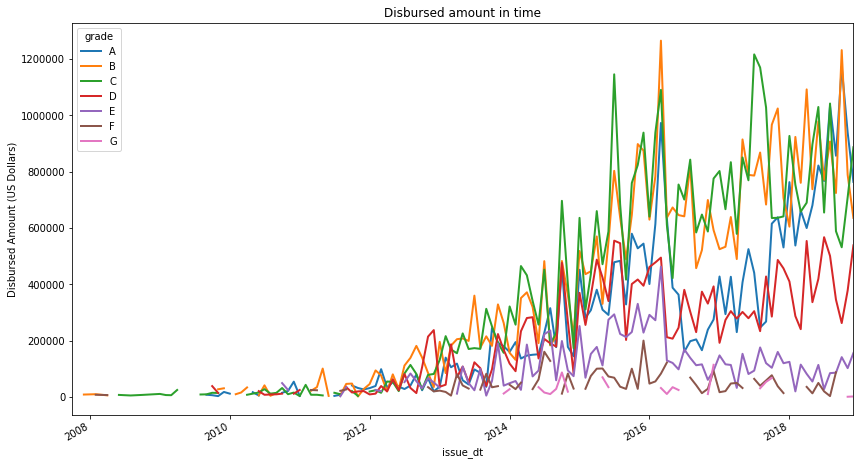

In [6]:
# Plot 3 Features
fig=df.groupby(['issue_dt','grade'])['loan_amnt'].sum().unstack().plot(figsize=(14, 8), linewidth=2)
fig.set_title('Disbursed amount in time')
fig.set_ylabel('Disbursed Amount (US Dollars)')

Lending Club seems to have increased the amount of money lent from 2013 onwards. The tendency indicates that they continue to grow. In addition, we can see that their major business comes from lending money to C and B grades.